# CNN for Image Classification



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----

# <a name='load'>Load MNIST data set</a>

In [3]:
from tensorflow.keras.datasets import mnist #load data from tensorfolw keras datasets

In [4]:
(x_train, y_train), (x_test, y_test) =mnist.load_data() #unpacke the pre-splitted(train, test) data

11501568/11490434 [==============================] - 0s 0us/step


-----

# Visualizing the Image Data

In [ ]:
x_train.shape

(60000, 28, 28)

There are 60,000 images with 28x28 dimensions

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

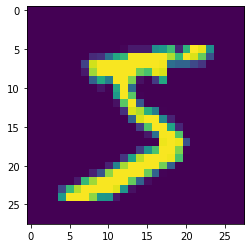

In [7]:
plt.imshow(single_image);

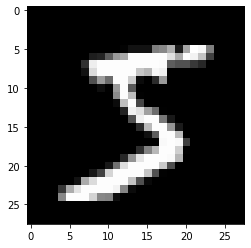

In [9]:
plt.imshow(single_image, cmap='gray'); #changing cmap to gray(as default cmap was 'viridis')

----

# PreProcessing Data

# Encoding Labels (one hot encoding)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape #Before One hot encoding

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [16]:
y_example #After one hot encoding,

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example[1] # for value 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Encoding Y_test labels

+ `num_classes`: number of unique classes 

10 unique digit(1-9) classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [17]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [18]:
y_cat_train = to_categorical(y_train, num_classes=10)

-------

# <a name='normalizing'>2) Normalizing Data</a>

In [19]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
single_image.min()

0

In [21]:
single_image.max()

255

Image is made up of 0-255 values.

In [27]:
x_train = x_train/255
x_test = x_test/255

In [28]:
scaled_image = x_train[0]

In [29]:
scaled_image

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [30]:
scaled_image.min(), scaled_image.max()

(0.0, 0.00392156862745098)

------

#Reshaping the Data

60,000 images stored in 28 by 28 pixel array formation. 

we have to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel). (an color image would have 3 dimensions)

In [31]:
x_train.shape

(60000, 28, 28)

#### Reshape to include channel dimension (in this case, 1 channel)

In [32]:
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [33]:
x_test = x_test.reshape(10000, 28, 28, 1)

-------

# <a name='training'>Training the Model</a>

### 4 main hyperparameters for Conv2D

filters
kernel_size
strides
padding

In [34]:
28*28


784

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

# One Set, as our model is simple we will use one set only
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28, 1), activation='relu')) # our images are 28x28 with 1 color channel, we also use default padding and stride

# Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Flattening the image from 28x28 to 784 before the final layer
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
# Multiclassfication problem => softmax
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/    => can refer various metrics avaliable
model.compile(loss='categorical_crossentropy', optimizer='adam',
                         metrics=['accuracy'])

# <a name='parameters'>Which parameters </a>
+ should we set based on our data?
+ can we play around ?

### Parameters to set based on our data
![set](set_parameters.png)

### Parameters that we can play around
![play](play_around_parameters.png)

### Check model summary

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Early Stopping

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
# we can also use val_accuracy
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1) 

# Train the Model

In [40]:
model.fit(x_train, y_cat_train, 
              validation_data=(x_test, y_cat_test),
              epochs=10, 
              callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7437 - accuracy: 0.7768 - val_loss: 0.3392 - val_accuracy: 0.8989
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3164 - accuracy: 0.9057 - val_loss: 0.2673 - val_accuracy: 0.9195
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2557 - accuracy: 0.9232 - val_loss: 0.2122 - val_accuracy: 0.9357
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2108 - accuracy: 0.9375 - val_loss: 0.1836 - val_accuracy: 0.9459
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1784 - accuracy: 0.9464 - val_loss: 0.1543 - val_accuracy: 0.9543
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1543 - accuracy: 0.9537 - val_loss: 0.1392 - val_accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1363 - accuracy: 0.9600 - val_loss: 0.1276 -

------

# Model Evaluation

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
metrics = pd.DataFrame(model.history.history)

In [43]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.743685,0.776833,0.339165,0.8989
1,0.316352,0.905667,0.267297,0.9195
2,0.255708,0.923200,0.212168,0.9357
3,0.210797,0.937483,0.183567,0.9459
4,0.178390,0.946450,0.154316,0.9543


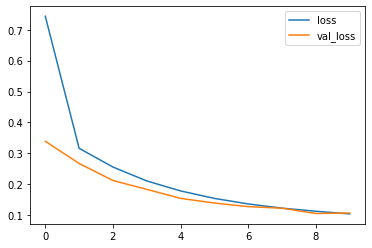

In [44]:
metrics[['loss', 'val_loss']].plot();

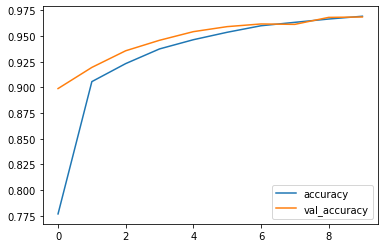

In [45]:
metrics[['accuracy', 'val_accuracy']].plot();

------

In [46]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.10693227499723434, 0.9685999751091003]

-----

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
predictions = np.argmax(model.predict(x_test), axis=-1)

### Comparing with actual y_test values (no longer categorical encoded values)

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.94      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.92      0.97      0.95       974
           9       0.98      0.93      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [50]:

confusion_matrix(y_test, predictions)

array([[ 970,    0,    1,    0,    1,    1,    2,    1,    4,    0],
       [   0, 1124,    3,    0,    0,    1,    1,    1,    5,    0],
       [   4,    1, 1009,    1,    3,    0,    1,    5,    8,    0],
       [   0,    0,   13,  970,    1,    0,    0,    9,   14,    3],
       [   0,    0,    6,    0,  962,    0,    4,    0,    3,    7],
       [   6,    1,    0,   18,    3,  837,    6,    2,   17,    2],
       [   4,    3,    2,    0,    5,    4,  933,    0,    7,    0],
       [   1,    8,   12,    1,    0,    1,    0,  997,    5,    3],
       [   4,    1,    2,    4,    5,    3,    4,    5,  946,    0],
       [   4,    8,    0,    7,   24,    0,    1,   10,   17,  938]])

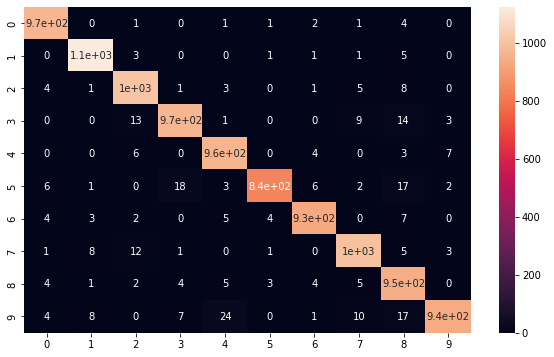

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

--------

# <a name='predicting'>Predicting a given image</a>

In [58]:
my_number = x_test[7]

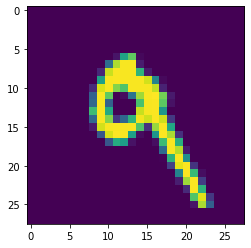

In [59]:
plt.imshow(my_number.reshape(28,28));

In [57]:
# need to reshape the image
# Number of image, width, height, number of color channels

np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=-1)

array([1])